In [1]:
import oracledb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


Matplotlib is building the font cache; this may take a moment.


In [2]:
conn = oracledb.connect("yuwen/12345@10.0.2.15:1521/xe")
cur = conn.cursor()

cur.execute("""
    SELECT freq_A, freq_T, freq_GC
    FROM beeGenes
""")

rows = cur.fetchall()

cur.close()
conn.close()

listA = []
listT = []
listGC = []

for r in rows:
    listA.append(r[0])
    listT.append(r[1])
    listGC.append(r[2])

A = np.array(listA).astype(float)
T = np.array(listT).astype(float)
GC = np.array(listGC).astype(float)

length = len(A)
X = np.empty((length, 3))
X[:, 0] = A
X[:, 1] = T
X[:, 2] = GC

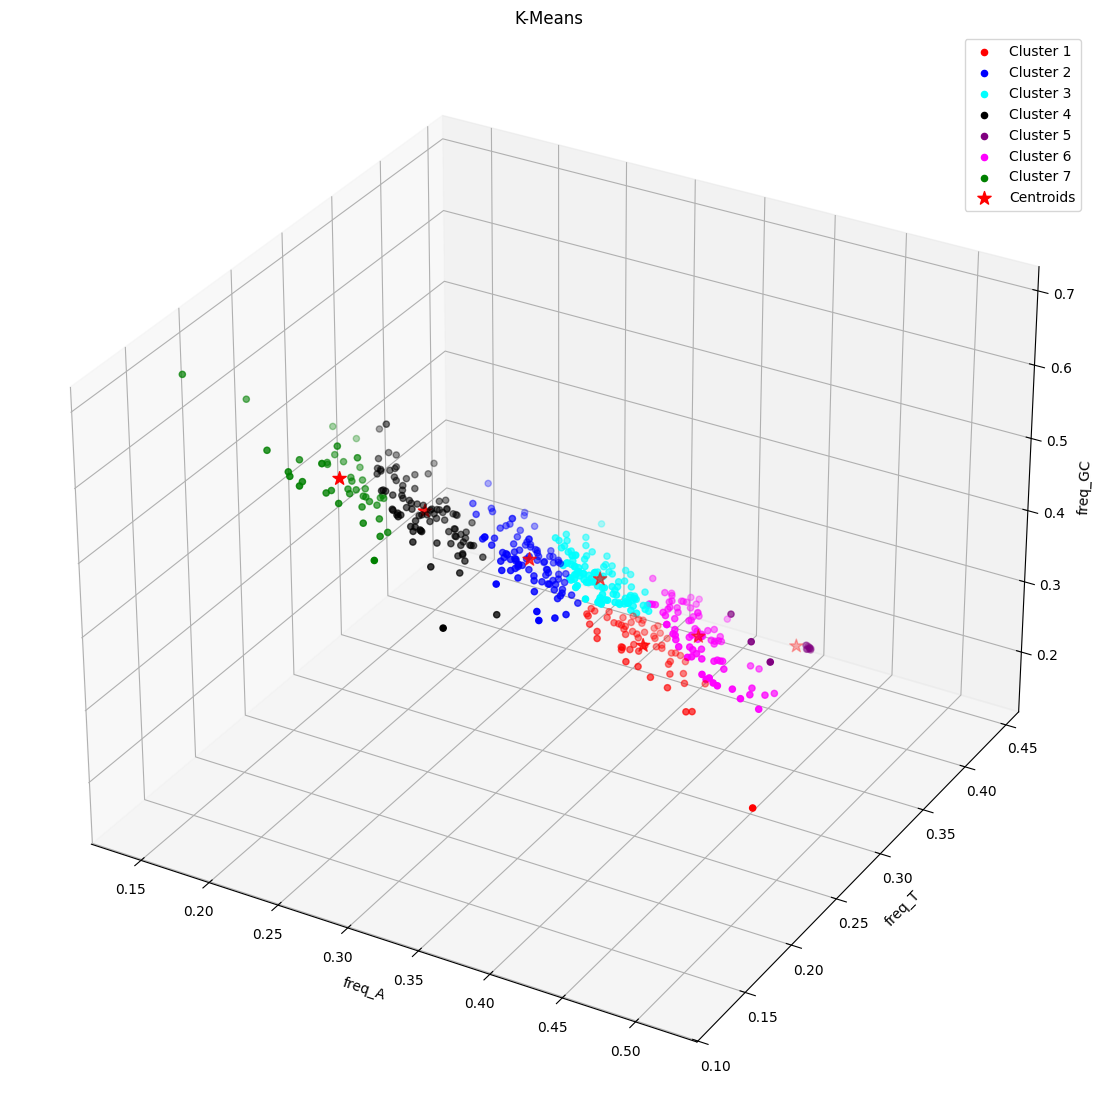

In [3]:
km = KMeans(
    n_clusters=7,
    init='random',
    n_init=10,
    max_iter=500,
    tol=1e-4,
    random_state=0
)

y_km = km.fit_predict(X)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'aqua', 'black', 'purple', 'magenta', 'green']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']

for i in range(7):
    ax.scatter(
        X[y_km == i, 0],
        X[y_km == i, 1],
        X[y_km == i, 2],
        c=colors[i],
        marker='o',
        s=20,
        label=labels[i]
    )

ax.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 2],
    c='red',
    marker='*',
    s=100,
    label='Centroids'
)

ax.set_title("K-Means")
ax.set_xlabel("freq_A")
ax.set_ylabel("freq_T")
ax.set_zlabel("freq_GC")
ax.legend(loc='upper right')

plt.show()